# Прогноз Цен На Подержанный Автомобиль

https://www.kaggle.com/datasets/ayaz11/used-car-price-prediction

**О наборе данных**

Набор данных, полученный с помощью веб-скребинга с известного в США рынка подержанных автомобилей Truecars.com

In [215]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [216]:
# Переменные

# Переменая для количечтва строк в head

a = 1000000

# Переменная для размера графиков

b = 20

In [217]:
# Получите текущую рабочую директорию
current_directory = %pwd

# Укажите имя файла
csv_filename = "3_Прогноз Цен На Подержанный Автомобиль.csv"

# Соберите полный путь к файлу CSV
csv_path = os.path.join(current_directory, csv_filename)

# Загрузите данные из CSV файла в DataFrame
input_raw = pd.read_csv(csv_path)

In [218]:
# Функция для извлечения бренда с учетом исключений
def extract_brand(name):
    if name.startswith(('Alfa Romeo', 'Aston Martin', 'Land Rover')):
        return ' '.join(name.split(' ', 2)[:2])
    else:
        return name.split(' ', 1)[0]

# Добавление колонки "brand"
input_raw['brand'] = input_raw['name'].apply(extract_brand)

In [219]:
# Функция для определения модели в соответствии с указанными исключениями
def extract_model(row):
    brand = row['brand']
    name = row['name']
    
    if brand in ['Alfa Romeo', 'Aston Martin', 'Land Rover']:
        # Для Alfa Romeo, Aston Martin и Land Rover берем все слова после второго пробела
        words = name.split(' ', 2)
        if len(words) > 2:
            return words[2]
    else:
        # Для других брендов берем все слова после первого пробела
        words = name.split(' ', 1)
        if len(words) > 1:
            return words[1]
    
    # Если не удалось извлечь модель, возвращаем пустую строку
    return ''

# Добавление новой колонки "model" с использованием функции extract_model
input_raw['model'] = input_raw.apply(extract_model, axis=1)

In [220]:
# Добавление колонки miles_int
input_raw['miles_int'] = input_raw['miles'].str.replace(' miles', '').str.replace(',', '').astype('int64')

# Добавление колонки price_int
input_raw['price_int'] = input_raw['price'].str.replace('$', '').str.replace(',', '').astype('int64')

df = input_raw

df.head(a)

,name,year,miles,color,condition,price,brand,model,miles_int,price_int
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988",Kia,Forte,41406,15988
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008",Chevrolet,Silverado 1500,15138,38008
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988",Toyota,RAV4,32879,24988
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998",Honda,Civic,37190,18998
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498",Honda,Civic,27496,19498
...,...,...,...,...,...,...,...,...,...,...
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","2 accidents reported, 3 Owners","$8,995",Ford,Escape,98601,8995
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","1 accident reported, 3 Owners","$9,495",Mercedes-Benz,R-Class,120694,9495
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999",Mercedes-Benz,GLC,27894,29999
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992",Honda,CR-V,50220,22992


In [221]:
df.describe()

,year,miles_int,price_int
count,2840.000000,2840.000000,2840.000000
mean,2018.833803,50138.445775,25745.427465
std,3.557585,36482.439893,13627.610019
min,2000.000000,25.000000,4395.000000
25%,2017.000000,23233.750000,17851.000000
50%,2020.000000,41076.000000,23000.000000
75%,2021.000000,70978.250000,31222.500000
max,2024.000000,307292.000000,252900.000000


Количество автомобилей: 2 840 штук.  
Средний год выпуска автомобиля: 2018  
Средний пробег автомобиля 50 138 милль.  
Средняя стоимость автомобиля: 25 745 $. 

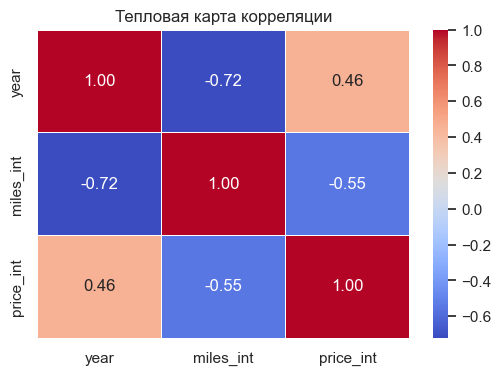

In [222]:
df_copy = df.copy(deep = True)

# Выбираем нужные столбцы
selected_columns = ['year', 'miles_int', 'price_int']

# Создаем подмножество DataFrame с выбранными столбцами
selected_df = df_copy[selected_columns]

# Строим матрицу корреляции
correlation_matrix = selected_df.corr()

# Настраиваем стиль тепловой карты
sns.set(style="white")

# Создаем тепловую карту
plt.figure(figsize=(b * 0.3, b * 0.2))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Тепловая карта корреляции')
plt.show()

**Вывод**  
Цена зависит от года, чем выше год тем выше цена.  
Цена зависит от пробега чем выше пробег, тем ниже цена.  
Чем меньше год, тем меньше пробег.  

/Users/maxim_manuyko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


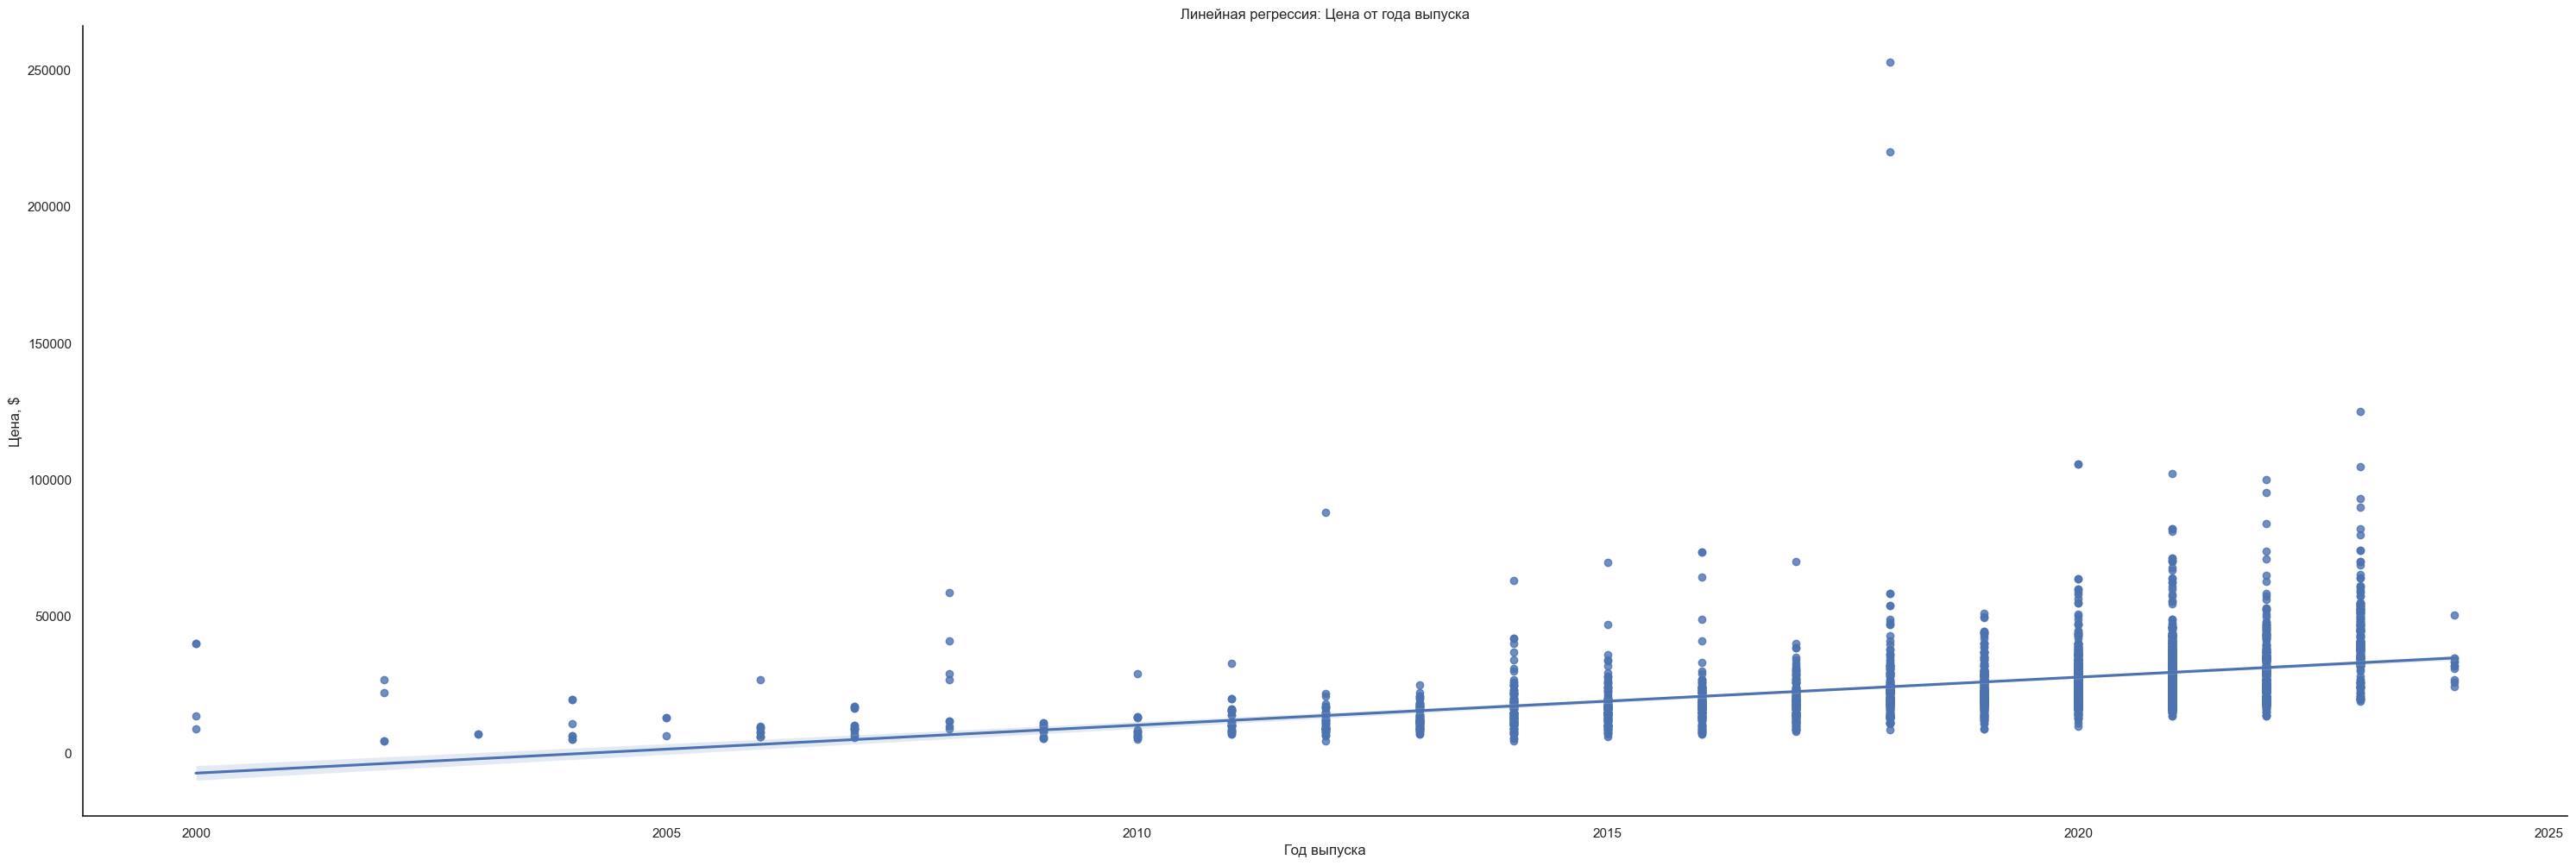

In [223]:
df_copy = df.copy(deep=True)

# Постройте lmplot
sns.lmplot(x='year', y='price_int', data=df_copy, height=b * 0.5, aspect=3)

# Установите подписи осей на русском языке
plt.xlabel('Год выпуска')
plt.ylabel('Цена, $')
plt.title('Линейная регрессия: Цена от года выпуска')

# Покажите график
plt.show()

/Users/maxim_manuyko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


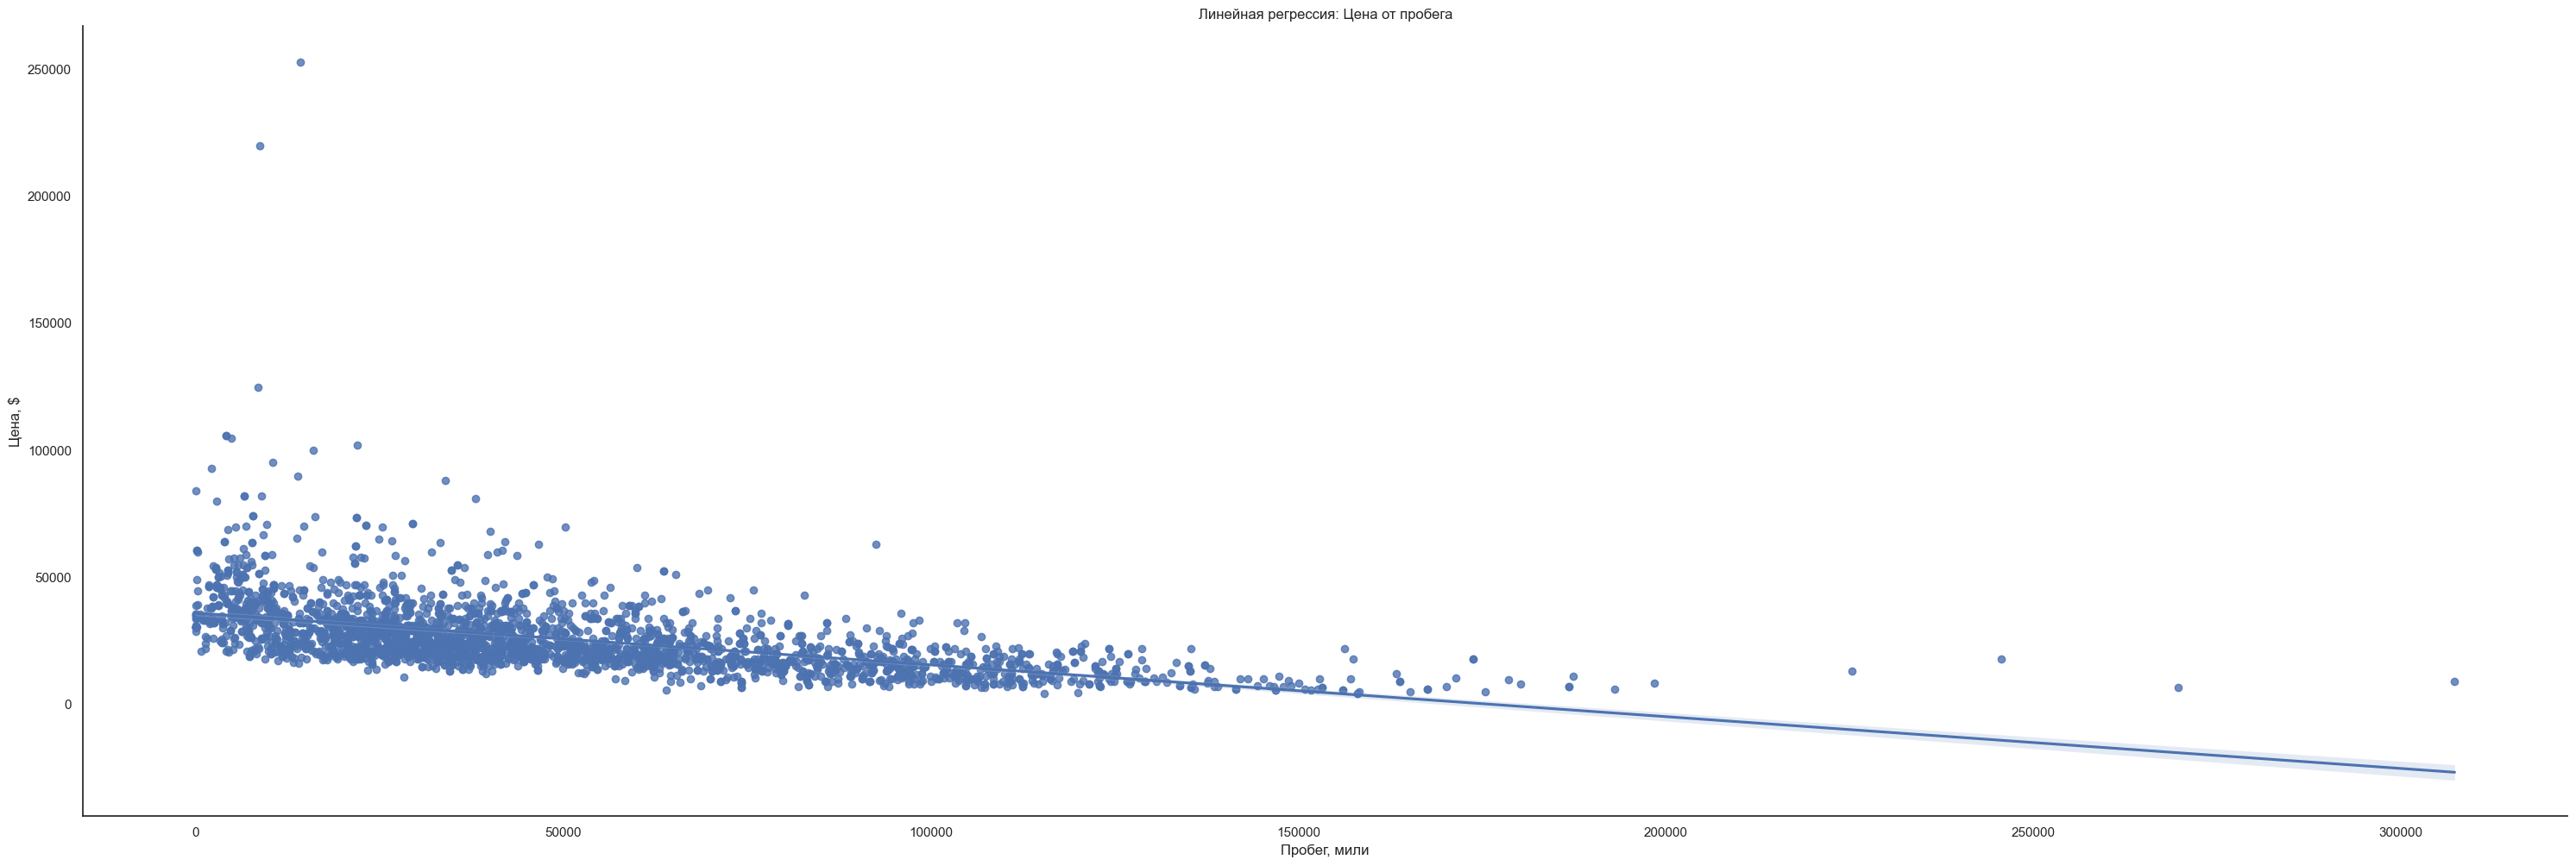

In [224]:
df_copy = df.copy(deep=True)

# Строим линейную регрессию
sns.lmplot(x='miles_int', y='price_int', data=df_copy, height= b * 0.5, aspect=3)

# Устанавливаем заголовок и подписи осей на русском языке
plt.title('Линейная регрессия: Цена от пробега')
plt.xlabel('Пробег, мили')
plt.ylabel('Цена, $')

# Показываем график
plt.show()

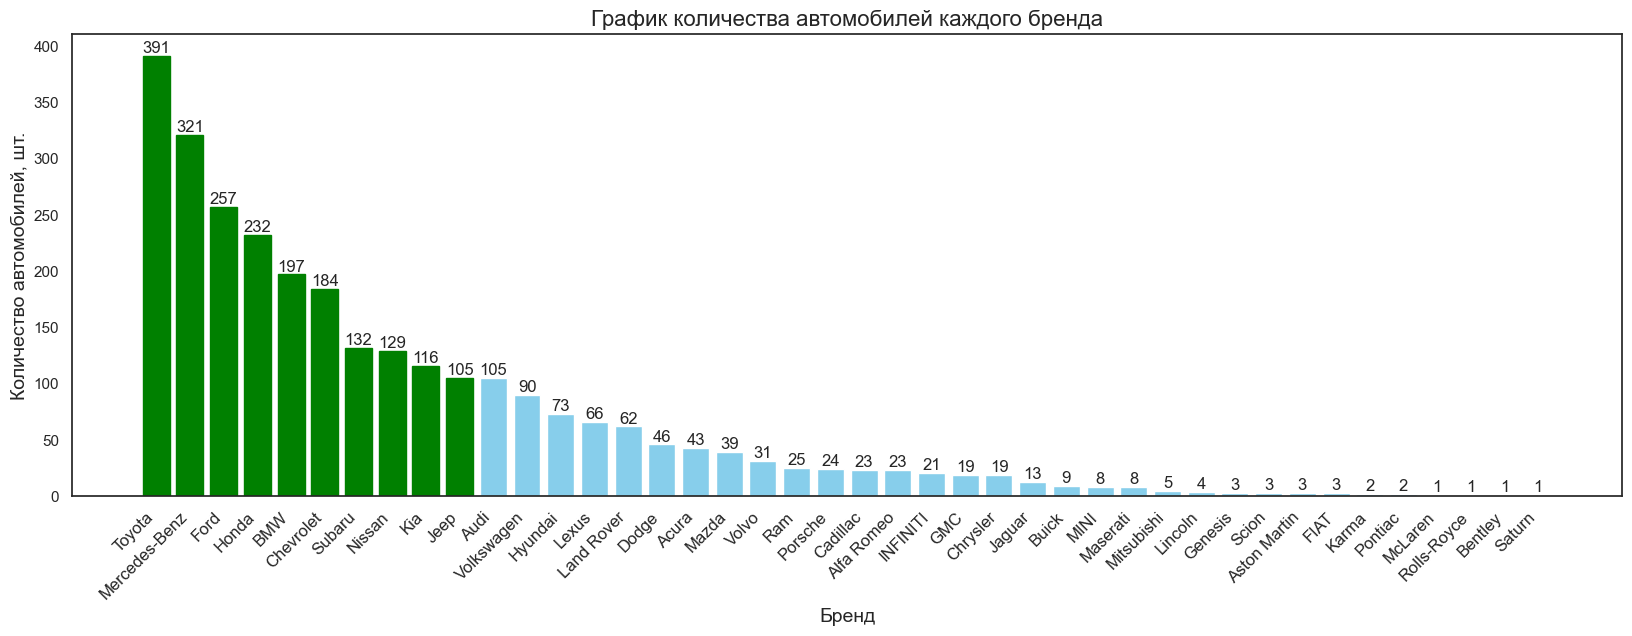

In [225]:
df_copy = df.copy(deep = True)

# Построение столбчатого графика
plt.figure(figsize=(b , b * 0.3))

# Сортировка данных по увеличению
sorted_data = df_copy['brand'].value_counts().sort_values(ascending=False)

# Построение столбчатого графика
bars = plt.bar(sorted_data.index, sorted_data.values, color='skyblue')

# Устанавливаем зелёный цвет для первых 10 столбцов
for bar in bars[:10]:
    bar.set_color('green')
    
# Добавление значений над столбиками
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Настройки графика
plt.xlabel('Бренд', fontsize=14)
plt.ylabel('Количество автомобилей, шт.', fontsize=14)
plt.title('График количества автомобилей каждого бренда', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Отображение графика
plt.show()

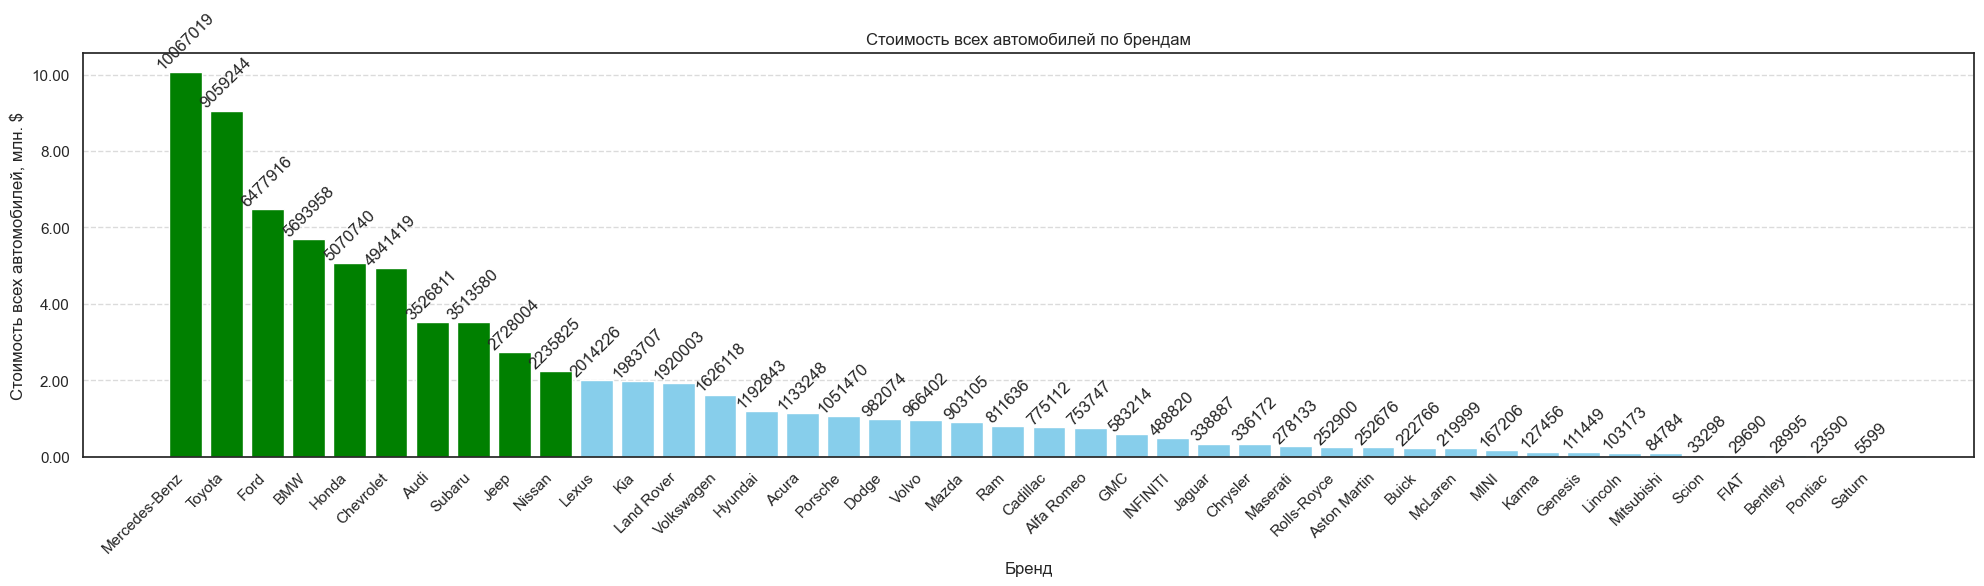

In [226]:
df_copy = df.copy(deep = True)

# Группировка данных по бренду и суммирование цен
grouped_data = df_copy.groupby('brand')['price_int'].sum().sort_values(ascending=False)

# Построение столбчатого графика
fig, ax = plt.subplots(figsize=(b, b * 0.3))
bars = ax.bar(grouped_data.index, grouped_data.values, color='skyblue')

# Цвета для первых 10 столбиков
colors = ['green' if i < 10 else 'skyblue' for i in range(len(grouped_data))]

bars = ax.bar(grouped_data.index, grouped_data.values, color=colors)

# Добавление значений над столбиками
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation=45)

# Форматирование оси y в миллионы долларов
def millions_formatter(x, pos):
    return f'{x / 1e6:.2f}'

formatter = FuncFormatter(millions_formatter)
ax.yaxis.set_major_formatter(formatter)

# Добавление горизонтальной сетки
ax.yaxis.grid(True, linestyle='--', alpha=0.7, which='major')

# Настройка осей и подписей
plt.xticks(rotation=45, ha='right')
plt.xlabel('Бренд')
plt.ylabel('Стоимость всех автомобилей, млн. $')
plt.title('Стоимость всех автомобилей по брендам')
plt.tight_layout()

# Показать график
plt.show()


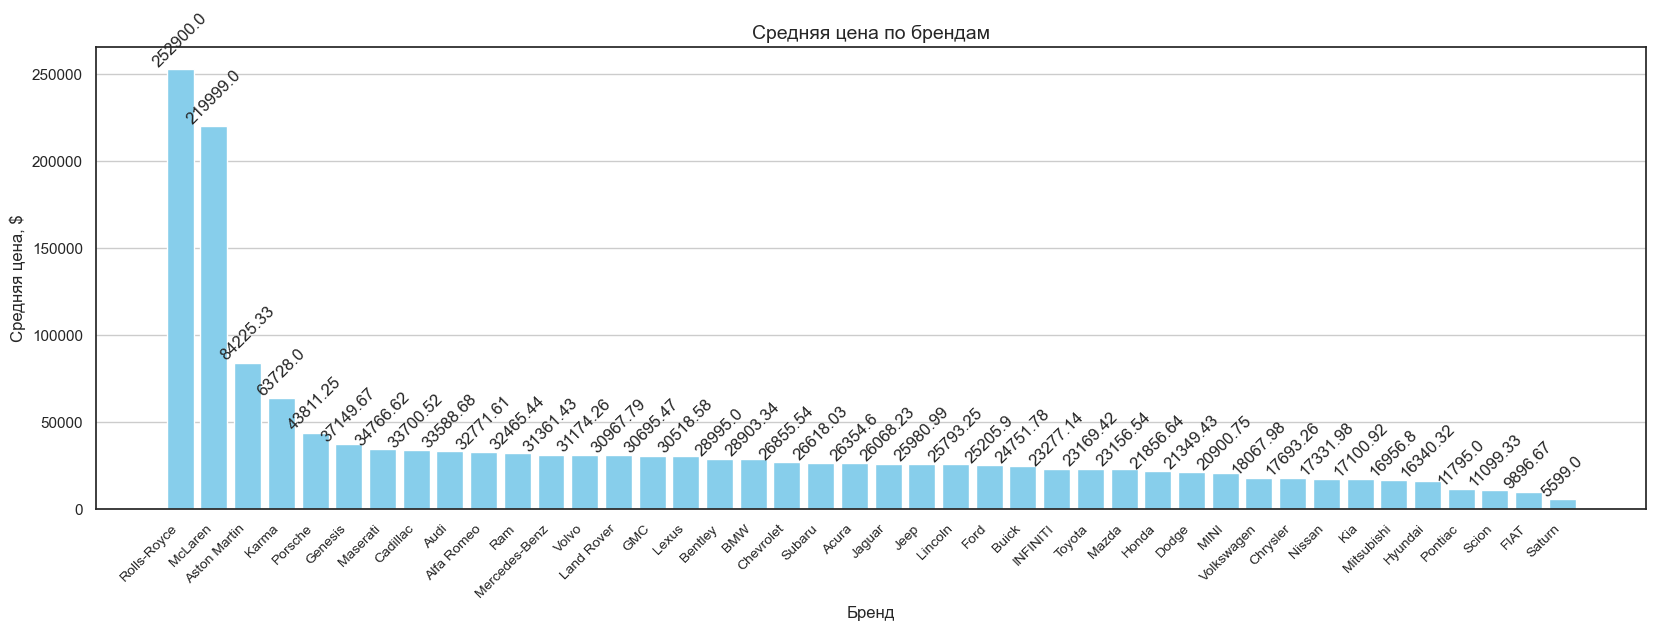

In [227]:
df_copy = df.copy(deep = True)

# Группировка по брендам и вычисление средней цены для каждого бренда
average_prices = df_copy.groupby('brand')['price_int'].mean().sort_values(ascending=False)

# Построение столбчатого графика
plt.figure(figsize=(b, b * 0.3))
bars = plt.bar(average_prices.index, average_prices.values, color='skyblue')

# Добавление значений над столбиками без смещения
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation=45)

# Настройка осей и подписей
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Бренд', fontsize=12)
plt.ylabel('Средняя цена, $', fontsize=12)
plt.title('Средняя цена по брендам', fontsize=14)
plt.grid(axis='y')

# Отображение графика
plt.show()

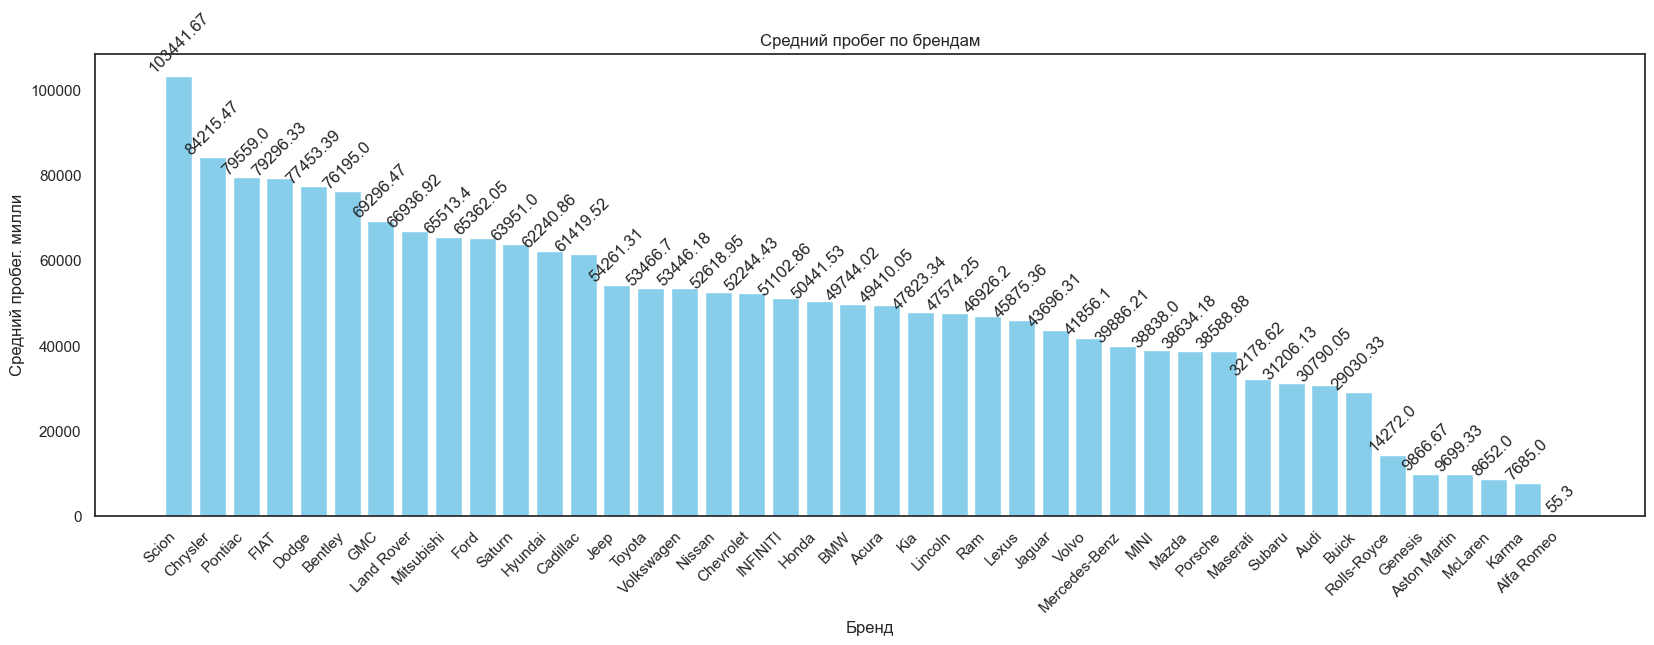

In [228]:
df_copy = df.copy(deep = True)

# Группировка по бренду и вычисление среднего значения пробега
grouped_df = df_copy.groupby('brand')['miles_int'].mean()

# Сортировка по уменьшению
grouped_df = grouped_df.sort_values(ascending=False)

# Создание столбчатого графика
fig, ax = plt.subplots(figsize=(b, b * 0.3))

# Построение графика
bars = ax.bar(grouped_df.index, grouped_df.values, color='skyblue')

# Добавление значений над столбиками
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation=45)

# Настройка осей и подписей
plt.xticks(rotation=45, ha='right')
plt.xlabel('Бренд')
plt.ylabel('Средний пробег. милли')
plt.title('Средний пробег по брендам')

# Отображение графика
plt.show()

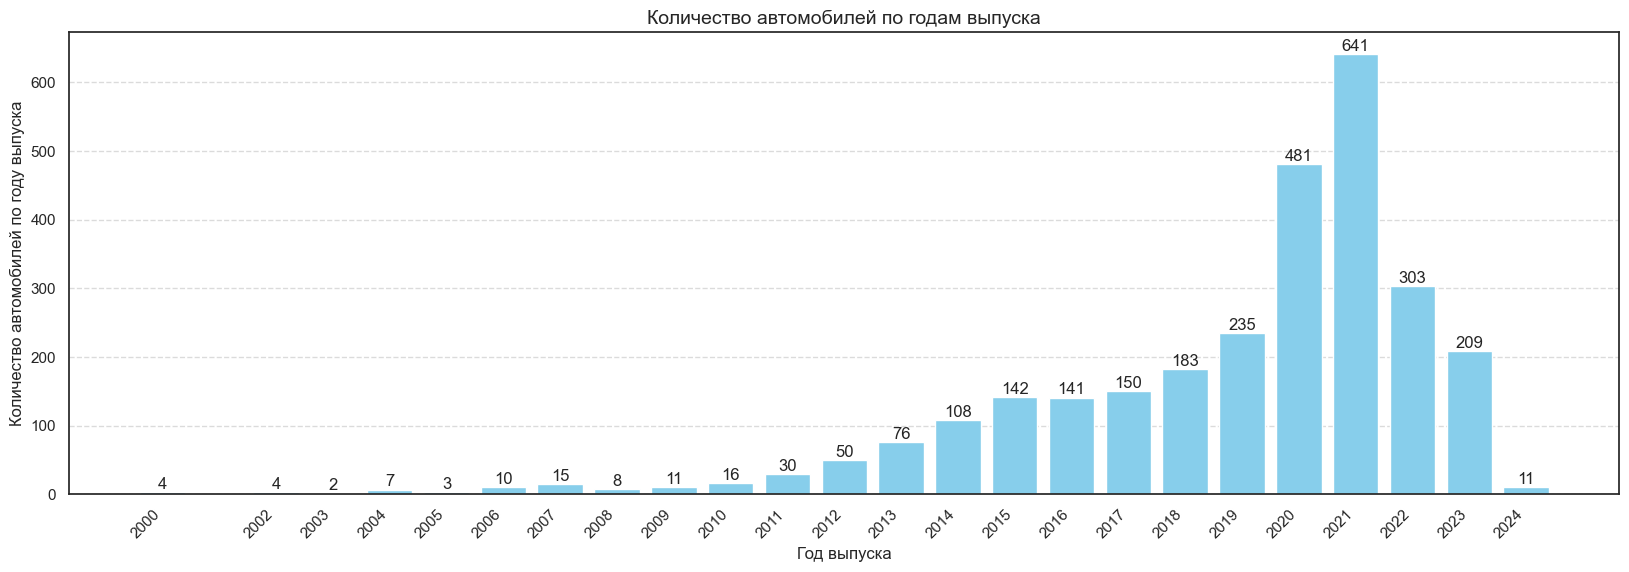

In [229]:
df_copy = df.copy(deep = True)

# Группируем по году и считаем количество строк в каждой группе
grouped_df = df_copy.groupby('year').size().reset_index(name='count')

# Сортируем по увеличению года
grouped_df = grouped_df.sort_values(by='year')

# Строим столбчатый график
plt.figure(figsize=(b, b * 0.3))
bars = plt.bar(grouped_df['year'], grouped_df['count'], color='skyblue')

# Добавляем значения над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Настройки графика
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество автомобилей по году выпуска', fontsize=12)
plt.title('Количество автомобилей по годам выпуска', fontsize=14)
plt.xticks(grouped_df['year'], rotation=45, ha='right')  # Подписи оси X под углом 45 градусов
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображаем график
plt.show()

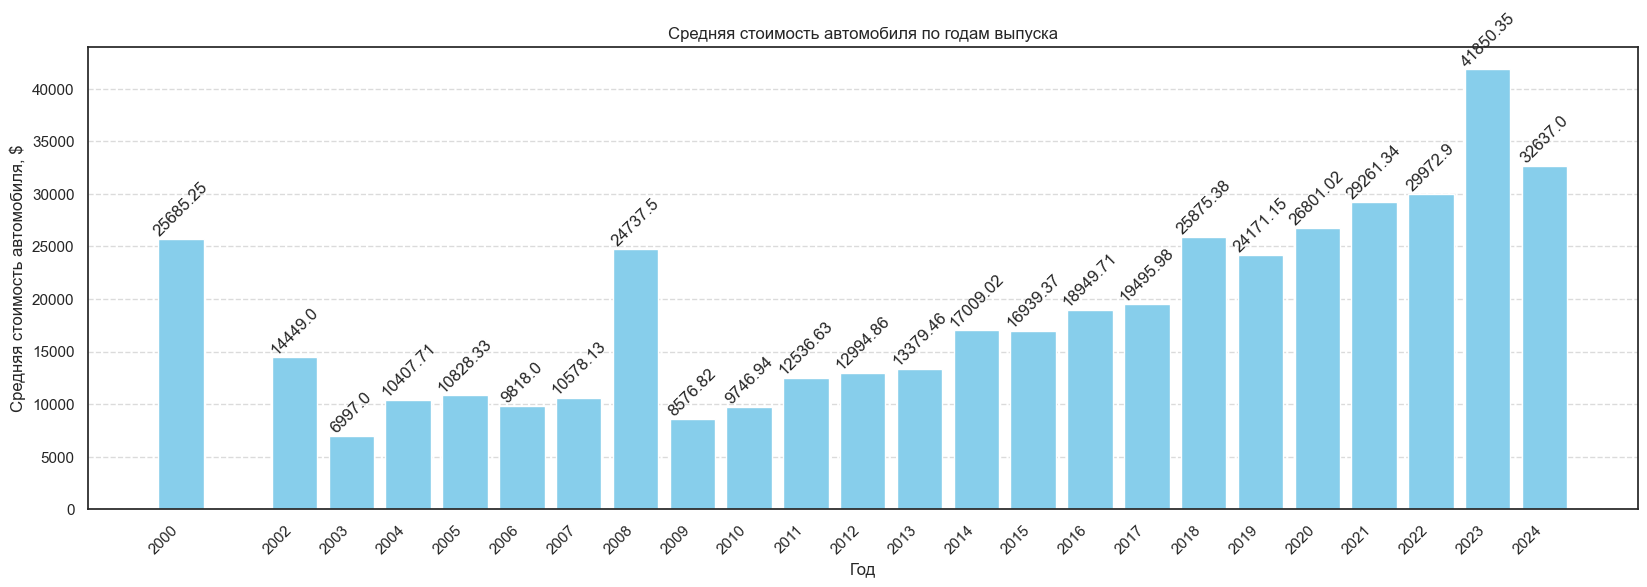

In [230]:
df_copy = df.copy(deep = True)

# Группировка и вычисление средней стоимости авто по годам
grouped_data = df_copy.groupby('year')['price_int'].mean().reset_index()

# Сортировка по возрастанию года
grouped_data = grouped_data.sort_values(by='year')

# Создание столбчатого графика
fig, ax = plt.subplots(figsize=(b, b * 0.3))  # Размер графика (b, b * 0.3)

# Построение столбчатой диаграммы
bars = ax.bar(grouped_data['year'], grouped_data['price_int'], color='skyblue')

# Добавление значений над столбиками
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation=45)

# Настройка осей и подписей
plt.xticks(grouped_df['year'], rotation=45, ha='right')
plt.xlabel('Год')
plt.ylabel('Средняя стоимость автомобиля, $')
plt.title('Средняя стоимость автомобиля по годам выпуска')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение графика
plt.show()

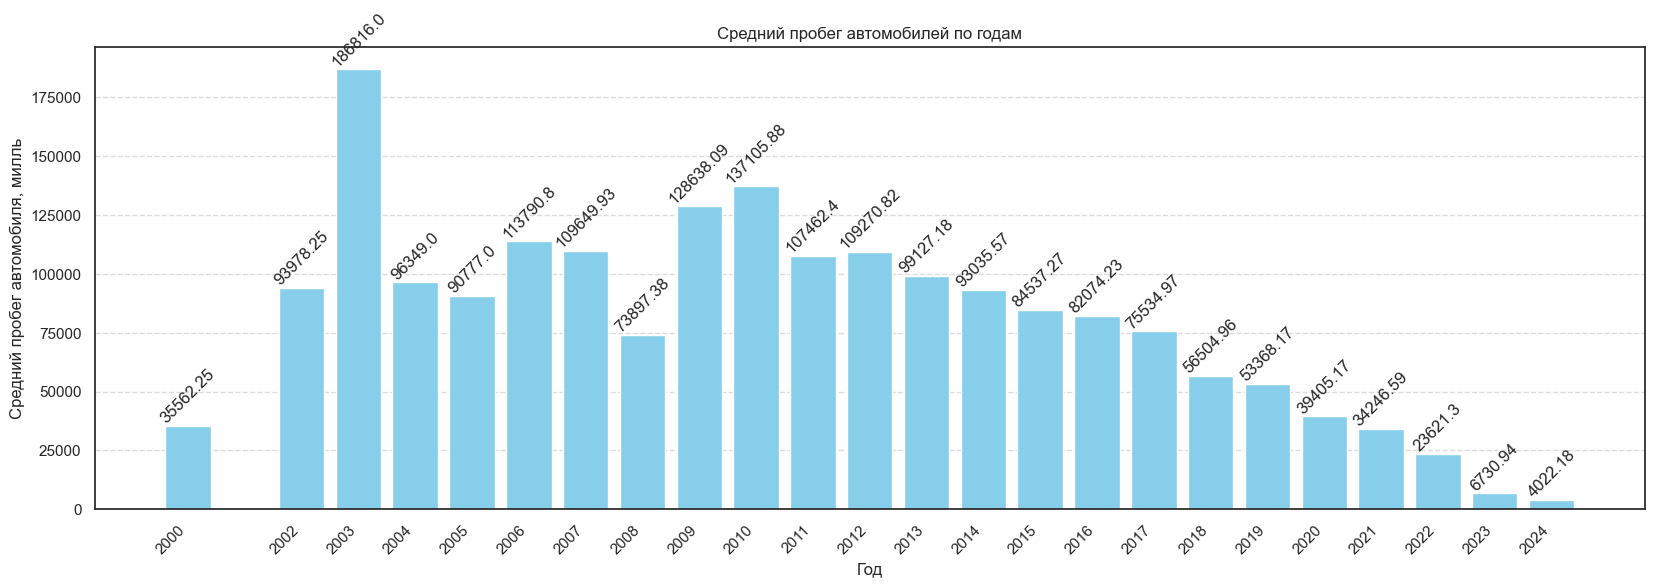

In [231]:
df_copy = df.copy(deep = True)

# Группировка и вычисление средней стоимости авто по годам
grouped_data = df_copy.groupby('year')['miles_int'].mean().reset_index()

# Сортировка по возрастанию года
grouped_data = grouped_data.sort_values(by='year')

# Создание столбчатого графика
fig, ax = plt.subplots(figsize=(b, b * 0.3))  # Размер графика (b, b * 0.3)

# Построение столбчатой диаграммы
bars = ax.bar(grouped_data['year'], grouped_data['miles_int'], color='skyblue')

# Добавление значений над столбиками
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', rotation=45)

# Настройка осей и подписей
plt.xticks(grouped_df['year'], rotation=45, ha='right')
plt.xlabel('Год')
plt.ylabel('Средний пробег автомобиля, милль')
plt.title('Средний пробег автомобилей по годам')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение графика
plt.show()

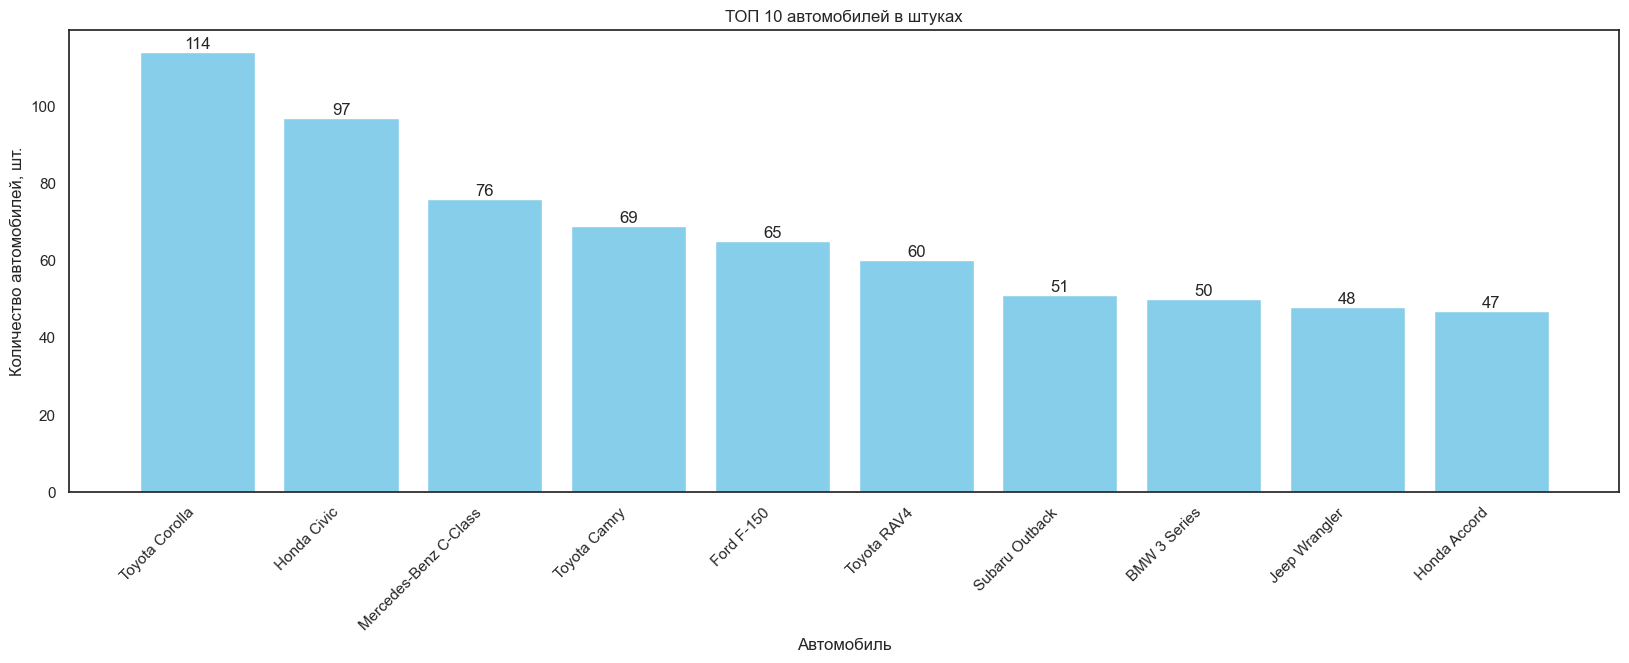

In [232]:
df_copy = df.copy(deep = True)

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(b, b * 0.3))

# Группировка и подсчет количества строк по 'name'
counts = df_copy['name'].value_counts()

# Сортировка по уменьшению
counts = counts.sort_values(ascending=False)

# Ограничение до первых 10
counts = counts.head(10)

# Построение столбчатого графика
bars = ax.bar(counts.index, counts.values, color='skyblue')

# Добавление значений над столбиками
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Настройка осей и подписей
ax.set_xlabel('Автомобиль')
ax.set_ylabel('Количество автомобилей, шт.')
ax.set_title('ТОП 10 автомобилей в штуках')

# Установка позиций меток на оси x и самих меток
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts.index, rotation=45, ha='right')

# Отображение графика
plt.show()